In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import IPython.display as display
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from fashion_cnn import coco_main
from mrcnn.model import log

import skimage.io
import cv2

# import imp
# imp.reload(utils)
from utils import DominantColors
from sklearn.cluster import KMeans

Using TensorFlow backend.


root_dir: C:\tensor_code\fashion
model_dir: C:\tensor_code\fashion\model
log_dir: C:\tensor_code\fashion\logs


In [3]:
%matplotlib inline

In [4]:
COCO_MODEL_PATH ='../model/mask_rcnn_coco_0_87_1_0069.h5'
MODEL_DIR = '../model'
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"


config = coco_main.FashionConfig()
dataset = coco_main.FashionDataset()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

print("Loading weights ", COCO_MODEL_PATH)
model.load_weights(COCO_MODEL_PATH, by_name=True)    

W0206 14:04:10.499631 28008 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0206 14:04:10.517585 28008 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0206 14:04:10.529551 28008 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                26
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

W0206 14:04:10.708074 28008 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0206 14:04:10.722037 28008 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0206 14:04:17.364266 28008 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0206 14:04:20.414106 28008 deprecation_wrapper.py:119] From ..\mrcnn\model.py:341: The name tf.log is deprecated. Please use tf.math.log instead.

W0206 14:04:20.546751 28008 deprecation.py:323] From ..\mrcnn\model.py:399: add_dispatch_support.<locals>.wrapper (

Loading weights  ../model/mask_rcnn_coco_0_87_1_0069.h5


In [5]:
json_file_dir = "C:/tensor_code/fashion/dataset/deepfashion2/train/coco_train_2.json"  # TODO: enter value here
image_dir="C:/tensor_code/fashion/dataset/deepfashion2/train/2"
dataset.load_coco(json_file_dir=json_file_dir,image_dir=image_dir)

# Must call before using the dataset
dataset.prepare()

loading annotations into memory...
Done (t=44.12s)
creating index...
index created!


In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [7]:
image=skimage.io.imread('../dataset/images_for_test/bad_fashion.png')

results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (832, 452, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


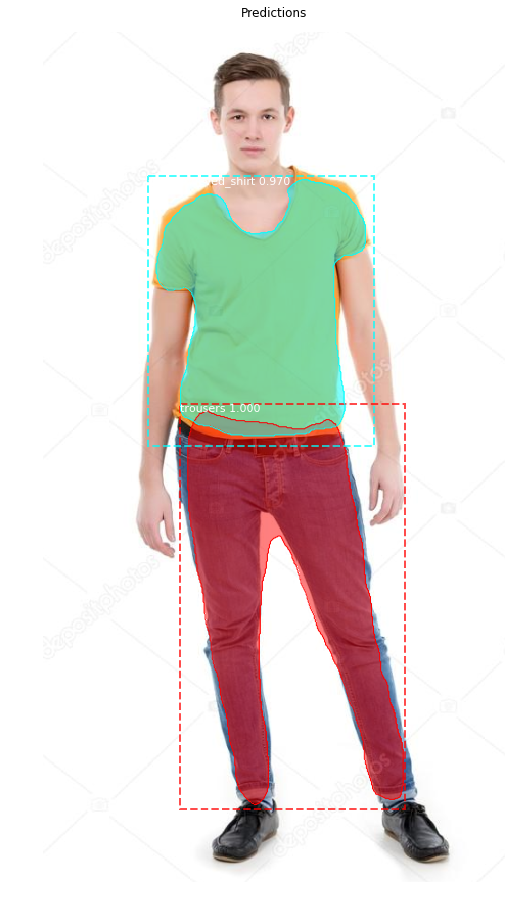

In [8]:
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

In [15]:
prediction_id=0
mask=results[0]['masks'][:,:,prediction_id]
category_id=results[0]['class_ids'][prediction_id]
category_name=dataset.class_names[category_id]

clusters = 3

roi_idx=results[0]['rois'][prediction_id]
cropped_img=image[roi_idx[0]:roi_idx[2],roi_idx[1]:roi_idx[3],:]

masked_image=image[mask]
dc = DominantColors(masked_image,clusters) 

colors = dc.dominantColors()

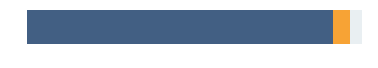

In [16]:
dc.plotHistogram()

In [17]:
prediction_id=1
mask=results[0]['masks'][:,:,prediction_id]
category_id=results[0]['class_ids'][prediction_id]
category_name=dataset.class_names[category_id]

clusters = 3

roi_idx=results[0]['rois'][prediction_id]
cropped_img=image[roi_idx[0]:roi_idx[2],roi_idx[1]:roi_idx[3],:]

masked_image=image[mask]
dc = DominantColors(masked_image,clusters) 

colors = dc.dominantColors()

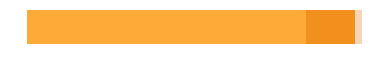

In [18]:
dc.plotHistogram()

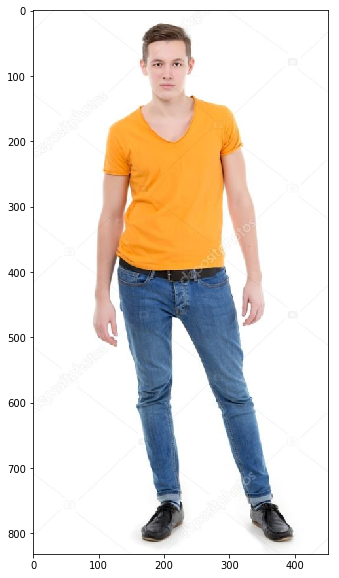

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(image)

## 개인의 옷장

### 1. Input : 개인 옷들
1. classification 상의 하의 
2. 상의 하의 별로 main color 분석

2020 SS 컬러 참고사이트 : https://www.whowhatwear.com/spring-summer-color-trends-2020/slide4

In [11]:
ss_color={'CD212A':[205,33,42],'798EA4':[121,142,164],'47C6A3':[71,198,163],'f88379':[248,131,121],'f4c430':[244,196,48], \
         '4A5335':[74,83,53],'FFFFFF':[255,255,255]}
color_name={'flame scarlet':'CD212A','faded denim':'798EA4','biscay green':'47C6A3','coral pink':'f88379','saffron':'f4c430', \
         'chive':'4A5335','white':'FFFFFF'}